### Basic Error Bars

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

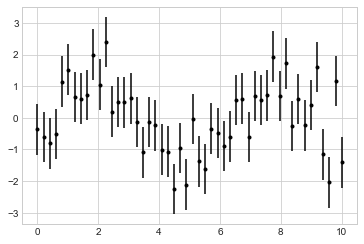

In [10]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Other options

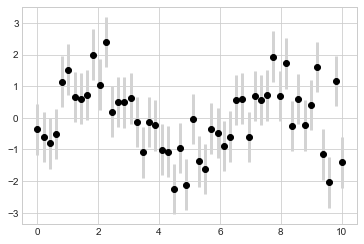

In [11]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0);

### Continuous Errors

In [16]:
# an example workaround
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x*np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

# compute the Gaussian process fit
gp= GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                   random_start=100)

gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0,10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma - 95% confidence region

C:\Users\Aroogz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Aroogz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


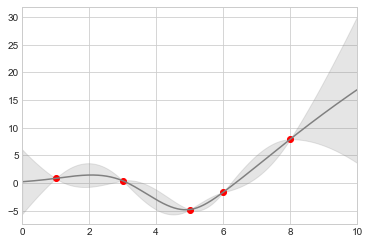

In [18]:
# visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

# to make look like continuous
plt.fill_between(xfit, yfit-dyfit, yfit+dyfit,
                color='gray', alpha=0.2) # essentially filling between two curves
plt.xlim(0, 10);

Note what we’ve done here with the fill_between function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.